In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
from qiskit.circuit.library.standard_gates import XGate, HGate
from operator import *


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
n = 3
N = 8 #2**n
index_colour_table = {}

colour_hash_map = {}
index_colour_table = {'000':"yellow", '001':"red", '010':"blue", '011':"red", '100':"green", '101':"blue", '110':"orange", '111':"red"}
colour_hash_map = {"yellow":'100', "red":'011', "blue":'000', "green":'001', "orange":'010'}


Database Encoding


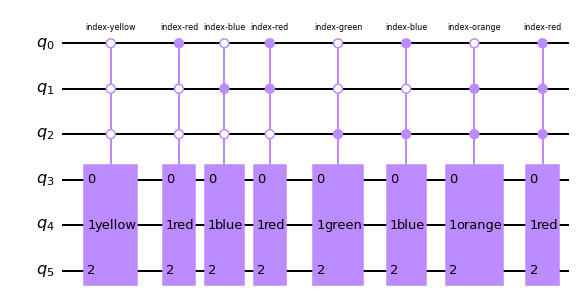

In [3]:
def database_oracle(index_colour_table, colour_hash_map):

    circ_database = QuantumCircuit(n + n)

    for i in range(N):
    
        circ_data = QuantumCircuit(n)
    
        idx = bin(i)[2:].zfill(n) # removing the "0b" prefix appended by the bin() funtion

    
        colour = index_colour_table[idx]
    
        colour_hash = colour_hash_map[colour][::-1]
    
        for j in range(n):
            if colour_hash[j] == '1':
                circ_data.x(j)
    
        # qiskit maps the rightmost bit as the 0th qubit -> qn, ..., q0
        # we therefore reverse the index string -> q0, ..., qn
    
        data_gate = circ_data.to_gate(label=colour).control(num_ctrl_qubits=n, ctrl_state=idx, label="index-"+colour)
    
        circ_database.append(data_gate, list(range(n+n)))
        
    return circ_database

# drawing the database oracle circuit

print("Database Encoding")
database_oracle(index_colour_table, colour_hash_map).draw()    

In [1]:
circ_data = QuantumCircuit(n)

m = 0
if n==2:
    m=3
elif n==3:
    m=4

idx = bin(m)[2:].zfill(n) # removing the "0b" prefix appended by the bin() funtion
    
colour = index_colour_table[idx]
    
colour_hash = colour_hash_map[colour][::-1]
    
for j in range(n):
    if colour_hash[j] == '1':
        circ_data.x(j)

print("Internal colour encoding for the colour green (as an example)");
        
circ_data.draw()


Traceback (most recent call last):
  Input In [1] in <module>
    circ_data = QuantumCircuit(n)
NameError: name 'QuantumCircuit' is not defined

Use %tb to get the full traceback.
